# The acceleration of a car

A car with diesel engine can speed up from rest to $100~km/h$ in $10$ seconds. Assuming the car as a point-like object that moves on a straight line and assuming that the **motion** occurs with **constant acceleration** we want to calculate the value of the acceleration and we want to estimate the displacement occured during the $10$ seconds needed to the car to reach the speed of $100~km/h$.


### Discussion of the problem

#### Calculating the acceleration
We describe the motion assuming the car moves along a horizontal axis, $x$, whose origin $O$ is chosen in the initial position of the car. 

If the car moves with constant acceleration, the instantaneous value of the acceleration is equal to the average value calculated on whichever time interval. Thus, using the definition of average acceleration in a time interval between time $t_0$ and time $t$, we have

$$ a = \dfrac{v - v_0}{t - t_0} $$

In this specific problem, aiming to calculate the acceleration in  $m/s^2$ we need to convert the value of the final velocity from $km/h$ to $m/s$.

#### Calculating the final position
In a motion with constant acceleration the particle's position at time $t$ is 

$$ x = x_0 + v_0(t-t_0) + \dfrac{1}{2}a (t-t_0)^2 $$

For $x_0 = 0$ and $v_0 = 0$, the equation giving $x$ as a function of the time $t$ (**kinetic equation**) becomes

$$ x = \dfrac{1}{2}a (t-t_0)^2 $$

Substituting for $a$ the value obtained from the first parto fo the problem, we can obtain the value of $x$. This value also corresponds to the displacement $x - x_0$  occurred during the first $(t-t_0)$ seconds, since in this case $x_0$ = 0.

Using symbolic calculus we obtain
$$ x = \dfrac{1}{2} \dfrac{v - v_0}{t - t_0} (t-t_0)^2 = \dfrac{1}{2} (v - v_0) (t-t_0) $$

In other words, in this problem $x$ represents the distance needed to speed up from rest to 100 km/h with constant acceleration.


### Calculation with Python

To calculate the acceleration and the displacement we tuse the equations obtained above. Since in a real case the time needed to go from 0 to 100 km/h depends on the kind of vehicle chosen, we can use a **slider** so that we can easily choose among different values the actual value to be assigned to the variable that represents the time, then we will calculate the corresponding result.

> You can work in an interactive mode and run the Python codes in the **binder** environment online,

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/POSS-UniMe/simple-physics-with-Python/HEAD)

&nbsp;


In [1]:
import ipywidgets as widgets

vf = 100/3.6     # final velocity (m/s)
v0 = 0          # initial velocity (m/s)

print()
print('\nFinal velocity = {0:0.3f} m/s \n'.format(vf))

sliderDt = (
    widgets.FloatSlider(min = 0, max = 20, step = 0.1, 
                        value = 10, description = 'Time (s)'))     # time (s)

def calculate(Dt):
    a = (vf-v0)/Dt    # acceleration (m/s^2)
    print('\nAccelerazione = {0:0.3f} m/s^2 \n'.format(a))
    Dx = 0.5*(vf-v0)*Dt    # displacement (m)
    print('The displacement occurred during the first {0:0.2f} seconds is {1:0.3f} m'.format(Dt,Dx))
    print()  
    
widgets.interact(calculate, Dt = sliderDt)



Final velocity = 27.778 m/s 



interactive(children=(FloatSlider(value=10.0, description='Time (s)', max=20.0), Output()), _dom_classes=('wid…

<function __main__.calculate(Dt)>

&nbsp;

In the following table we can find for different kind of cars the time needed to speed up from rest to 100 km/h. This parameter is very often used to express the performances of a car
&nbsp;


Car & model | Time 0 to 100 km/h | Source
-------------|---------------|--------------
Tesla model 3 | 3.4 s | [Tesla](https://www.tesla.com/it_it/model3)
Renault Kadjar dCi 115 cv Sport Edition | 11.7 s | [automoto.it](https://www.automoto.it/catalogo/renault/kadjar/dci-8v-115cv-sport-edition/132970/amp)
Toyota 1.5 Hybrid VVT-i | 9.7 s | [Toyota](https://www.toyota.it/)
Fiat Bravo 1.6 Multijet 16V 105 CV | 11.2 s | [Al volante](https://www.alvolante.it/)
Porsche Taycan Turbo S | 2.8 s | [Porsche](https://www.porsche.com/italy/models/taycan/taycan-models/taycan-turbo-s/)

### Get a feel of
Compare the value of the acceleration $a$ of a car with the value of the acceleration that characterizes the free fall of the bodies, i.e. the gravity acceleration.

&nbsp;


## Insights
### Graphical representations of the equations of motion

Let us consider the time intervale between the initial time $t_0$ and the time $t_0 + \Delta t$. We want to represent graphically the values of the variables that correspond to physical quantities characterizing the motion. This means that we want to obtain a plot of the values of the acceleration $a$, of the velocity $v$ and of the coordinate  $x$ (which describes the position of the car) as a function of time, $t$. 

To this aim we start considering an array of values of time linearly spaced in a chosen range, using the **linspace** function of the **numpy** library. Then, for the given value of the acceleration $a$, we calculate the values of the velocity $v$ according to the equation 

$$ v =  v_0 + a\cdot(t - t_0) $$

and the values of $x$ according to the equation

$$ x = x_0 + v_0 \cdot(t - t_0 ) + \dfrac{1}{2} a\cdot (t - t_0 ) ^2 $$.





In [2]:
import numpy as np
import matplotlib.pyplot as plt

t0 = 0
x0 = 0
Dt = sliderDt.value
a = (vf-v0)/Dt
print('acceleration = ', a)
numpoints = 100

t = np.linspace(t0,t0 + Dt,numpoints)

#print('Dt = ', Dt)
#print('numpoints = ', numpoints)
#print('times = ', t)

v = v0 + a * (t - t0)

x = x0 + v0 * (t - t0) + 0.5 * a * (t - t0)**2

fig1 = plt.figure(figsize=(7, 13))

plt.subplot(3, 1, 1)
plt.axhline(y = a, xmin = 0.05, xmax = 0.95, color = 'green', linewidth = 3)
plt.axhline(y=0, color = 'gray', zorder = -1)
plt.axvline(x=t0, zorder = -1, linestyle = '--')
plt.axvline(x=t0+Dt, zorder = -1, linestyle = '--')
plt.xlabel('time  $t$ (s)')
plt.ylabel('$a$ (m/s$^2$)')

plt.subplot(3, 1, 2)
plt.plot(t, v, '-', color = 'red', linewidth = 2)
plt.axhline(color = 'gray', zorder = -1)
plt.axhline(y = vf, xmin=0.05, xmax = 1, color = 'cyan', zorder = -1, linestyle = '--')
plt.axvline(color = 'gray', zorder = -1)
plt.xlabel('time  $t$ (s)')
plt.ylabel('$v$ (m/s)')

plt.subplot(3, 1, 3)
plt.plot(t, x, '-', color = 'blue', linewidth = 2)
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.xlabel('time  $t$ (s)')
plt.ylabel('$x$ (m)')



acceleration =  5.668934240362812


Text(0, 0.5, '$x$ (m)')

### Velocity as a function of the position

Can we estimate the velocity of the car just knowing its instantaneous position along the trajectory?

From the equations $x = x(t)$ and $v=v(t)$ we can obtain an equation which relates the velocity to the position:

$$ v^2 = v_0^2 + 2 a\cdot(x-x_0) $$

From this equation we can obtain the **module** of the velocity (but we loose information about the sign):

$$ v = \sqrt{v_0^2 + 2 a\cdot(x-x_0)} $$

Conversely, we can express the coordinate $x$ as a function of the velocity, using the equation

$$ x = x_0 + \dfrac{v^2-v_0^2}{2 a} $$

Text(0, 0.5, '$x$ (m)')

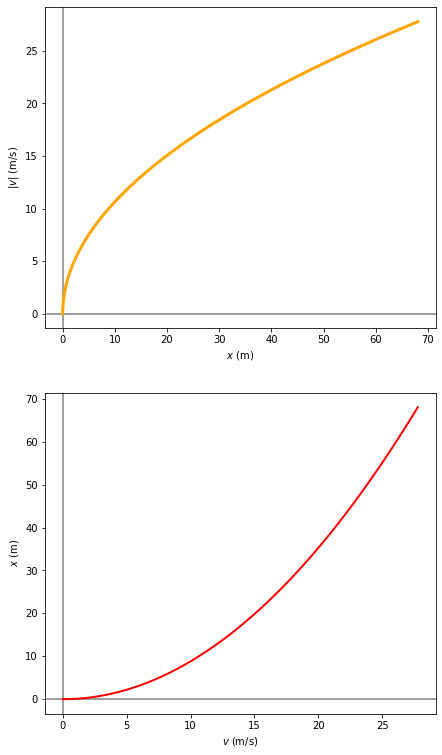

In [3]:
fig2 = plt.figure(figsize=(7, 13))

plt.subplot(2, 1, 1)
plt.plot(x, v, '-', color = 'orange', linewidth = 3)
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.xlabel('$x$ (m)')
plt.ylabel('$|v|$ (m/s)')

plt.subplot(2, 1, 2)
plt.plot(v, x, '-', color = 'red', linewidth = 2)
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.xlabel('$v$ (m/s)')
plt.ylabel('$x$ (m)')

## What we have learned
*Fisica*
* Using the equations for a motion with constant acceleration
* Estimating the acceleration in a phenomenon which concerns everyday's life.

*Python*
* Using Widgets
* Building a table that contains links
* Graphing a function
* Preparing a figure that contains several plots

## References
#### Equations for the motion with constant acceleration along a straight line
Young, Hugh, D. and Roger A. Freedman. University Physics with Modern Physics, eBook, Global Edition. Available from: VitalSource Bookshelf, (15th Edition). Pearson International Content, 2019.
&nbsp;

Serway, Raymond, A. et al. Physics for Global Scientists and Engineers, Volume 1. Available from: VitalSource Bookshelf, (2nd Edition). Cengage Learning Australia, 2016.
&nbsp;

#### Arrays with **numpy**
[Numpy arrays](https://physics.nyu.edu/pine/pymanual/html/chap3/chap3_arrays.html#numpy-arrays) in David J. Pine, [Introduction to Python for Science](https://physics.nyu.edu/pine/pymanual/html/pymanMaster.html)

[Play with numpy arrays](https://nbviewer.jupyter.org/github/engineersCode/EngComp1_offtheground/blob/master/notebooks_en/4_NumPy_Arrays_and_Plotting.ipynb) in Lorena Barba, Natalia Clementi, [Engineering Computations](https://github.com/engineersCode/EngComp)

#### Plotting functions
[Basic plotting](https://physics.nyu.edu/pine/pymanual/html/chap5/chap5_plot.html#basic-plotting) in  David J. Pine, [Introduction to Python for Science](https://physics.nyu.edu/pine/pymanual/html/pymanMaster.html)

[Time to plot](https://nbviewer.jupyter.org/github/engineersCode/EngComp1_offtheground/blob/master/notebooks_en/4_NumPy_Arrays_and_Plotting.ipynb#Time-to-Plot) in Lorena Barba, Natalia Clementi, [Engineering Computations](https://github.com/engineersCode/EngComp)


### Copyright and License
--------------------------
(c) 2021 Andrea Mandanici, Giuseppe Mandaglio, Giovanni Pirrotta, Valeria Conti Nibali, Giacomo Fiumara. All content is under Creative Common Attribution  <a rel="license" href="https://creativecommons.org/licenses/by/4.0" > CC BY 4.0 <a/> 
 and all code is under [BSD 3-Clause License](https://opensource.org/licenses/BSD-3-Clause). Notebook based on the Italian version
(c) 2020 Andrea Mandanici, Marco Guarnera, Giuseppe Mandaglio, Giovanni Pirrotta. All content is under Creative Common Attribution  <a rel="license" href="https://creativecommons.org/licenses/by/4.0" > CC BY 4.0 <a/> 
 and all code is under [BSD 3-Clause License](https://opensource.org/licenses/BSD-3-Clause)
